     The aim of this project is to build models that predicts house prices.

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split

# Loading the data

In [31]:
boston = load_boston()
X = boston["data"]
y = boston["target"]
cols = list(boston["feature_names"])
cols.append('MEDV')

In [32]:
print(cols)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [4]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [33]:
df = pd.DataFrame(np.c_[(X,y)],columns=cols)

# Exploratory Data Analysis

In [34]:
# Number of data points
print(len(df))

506


In [7]:
# Number of features
print(len(cols))

13


In [35]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [36]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [38]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# Data Visualization 

Text(0, 0.5, 'density')

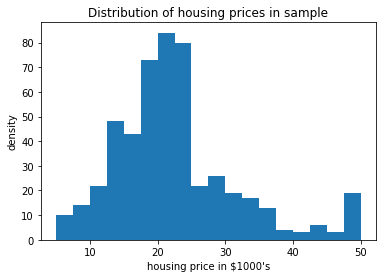

In [39]:
# Distribution of housing prices in sample
plt.hist(df['MEDV'], bins=18)
plt.title("Distribution of housing prices in sample")
plt.xlabel("housing price in $1000's")
plt.ylabel("density")

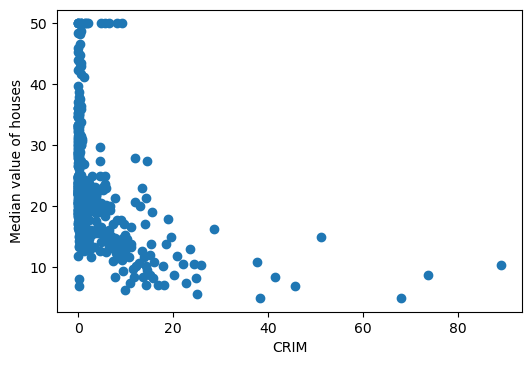

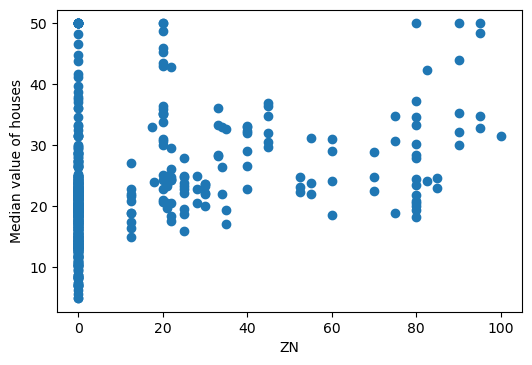

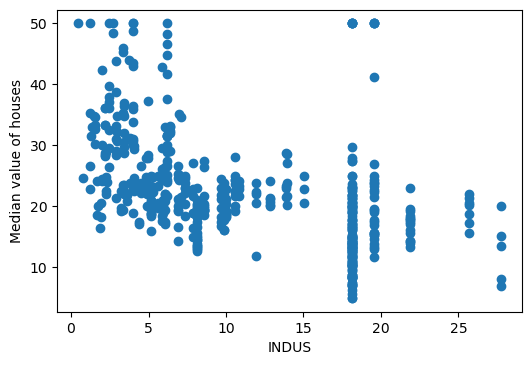

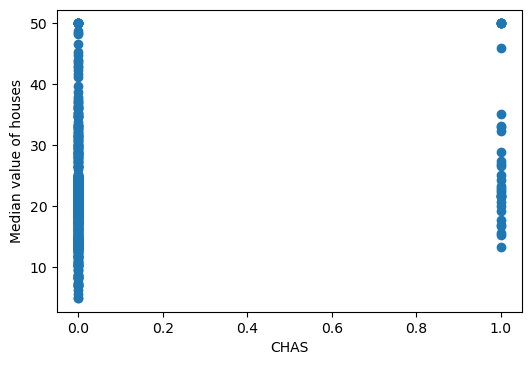

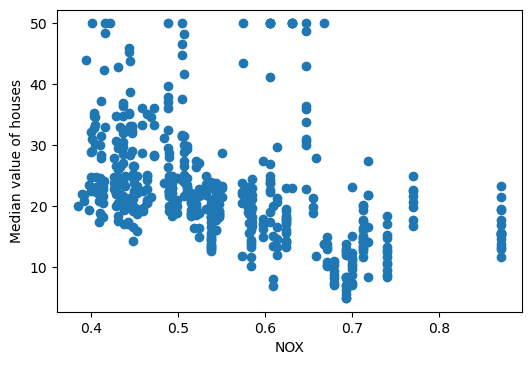

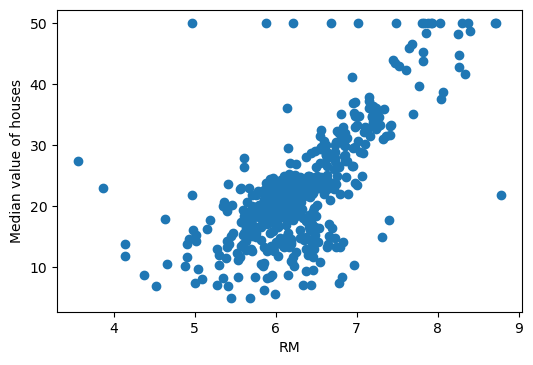

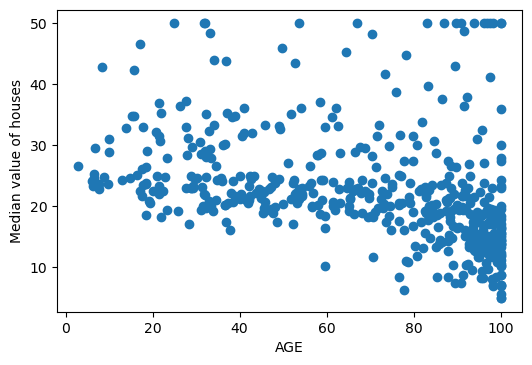

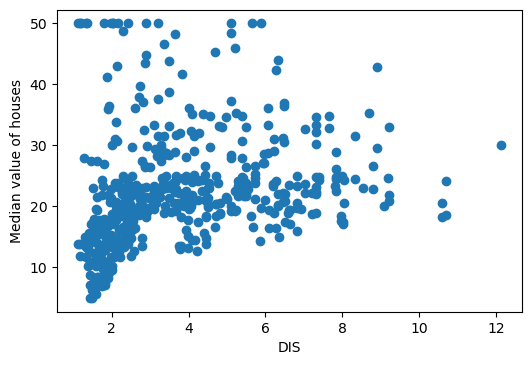

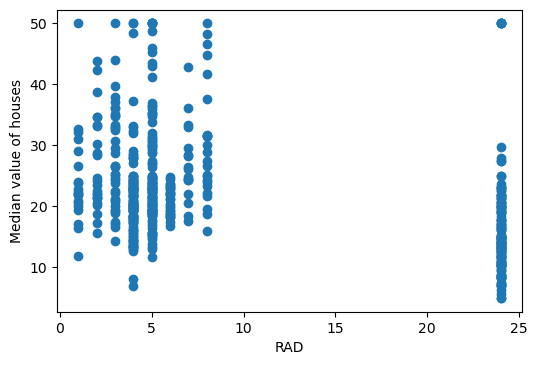

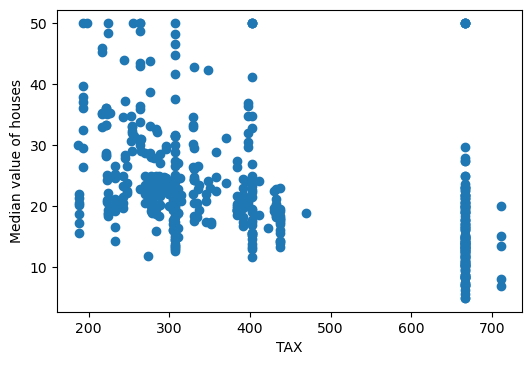

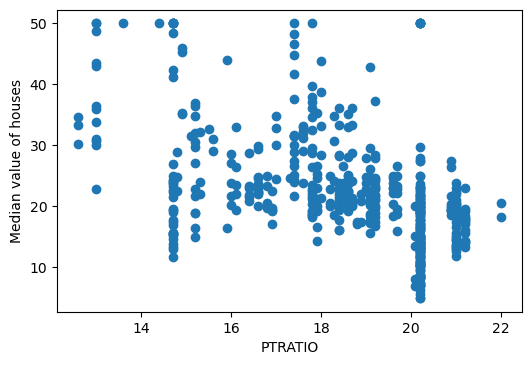

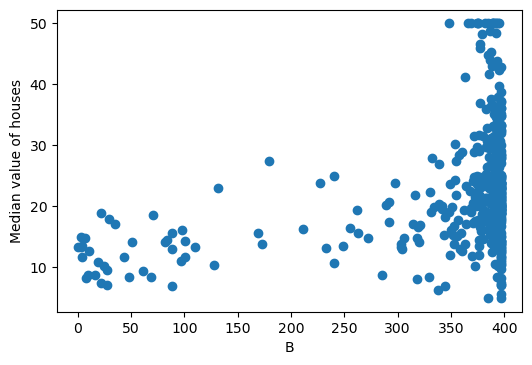

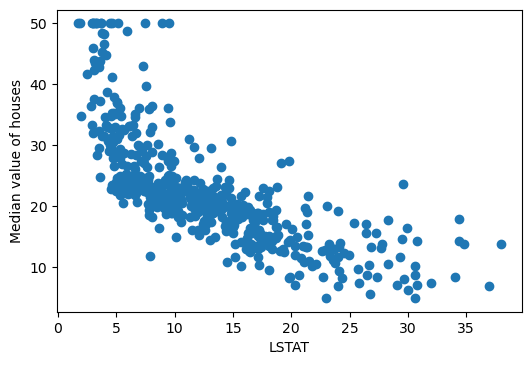

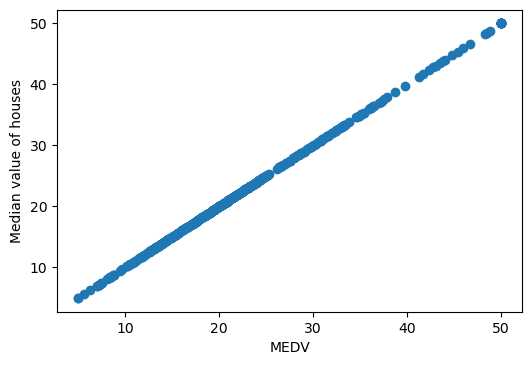

In [40]:
for c in cols:
    plt.figure(dpi=100)
    plt.scatter(df[c],df['MEDV'])
    plt.xlabel(c)
    plt.ylabel('Median value of houses')

plt.show()

In [43]:
df.corr()['MEDV']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

## Train & Test Split

In [44]:
X = df.drop(['MEDV'],axis = 1)
y = df['MEDV']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [51]:
def rmse(y_pred,y_test):
    return np.sqrt(mse(y_pred,y_test))

## Data Preprocessing

In [72]:
from sklearn.preprocessing import StandardScaler

In [74]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model Building

# Linear Regression

In [75]:

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_train_pred = lin_model.predict(X_train)
y_pred = lin_model.predict(X_test)

In [76]:
# Model Evaluation
print("Performance for Train Set")
print("Root mean square error : " , rmse(y_train_pred,y_train))
print("r2 Score : " , r2_score(y_train_pred,y_train))
print("Performance for Test Set")
print("Root mean square error : " , rmse(y_pred,y_test))
print("r2 Score : " , r2_score(y_pred,y_test))

Performance for Train Set
Root mean square error :  4.6520331848801675
r2 Score :  0.6682392734758826
Performance for Test Set
Root mean square error :  4.928602182665336
r2 Score :  0.6333247469014345


# SGD Regressor

In [77]:
sgd_model = SGDRegressor()
sgd_model.fit(X_train,y_train)
y_train_pred = sgd_model.predict(X_train)
y_pred = sgd_model.predict(X_test)

In [78]:
# Model Evaluation
print("Performance for Train Set")
print("Root mean square error : " , rmse(y_train_pred,y_train))
print("r2 Score : " , r2_score(y_train_pred,y_train))
print("Performance for Test Set")
print("Root mean square error : " , rmse(y_pred,y_test))
print("r2 score : " , r2_score(y_pred,y_test))

Performance for Train Set
Root mean square error :  4.667773843559186
r2 Score :  0.676220400199564
Performance for Test Set
Root mean square error :  5.029629107187988
r2 score :  0.622764895897481


# Decision Tree Model

In [79]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train,y_train)
y_train_pred = sgd_model.predict(X_train)
y_pred = sgd_model.predict(X_test)

In [80]:
# Model Evaluation
print("Performance for Train Set")
print("Root mean square error : " , rmse(y_train_pred,y_train))
print("r2 Score : " , r2_score(y_train_pred,y_train))
print("Performance for Test Set")
print("Root mean square error : " , rmse(y_pred,y_test))
print("r2 score : " , r2_score(y_pred,y_test))

Performance for Train Set
Root mean square error :  4.667773843559186
r2 Score :  0.676220400199564
Performance for Test Set
Root mean square error :  5.029629107187988
r2 score :  0.622764895897481
